<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET - Logement </h1>
</div>

**Votre tâche consiste à prédire les valeurs médianes des maisons dans les quartiers californiens, compte tenu d'un certain nombre de caractéristiques de ces les quartiers. (Pour une meilleure évaluation en utilisant "Pipeline", "Evaluation Cross-validation", "Grid search" ...**

Données : https://www.kaggle.com/camnugent/california-housing-prices

About this file

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.formula.api as smf
import itertools
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from datetime import datetime
from os import getcwd
from mpl_toolkits.mplot3d import Axes3D
from joblib import dump, load
import matplotlib.image as mpimg
from function import *

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

print("Chargement des données...")
# Récupère le répertoire du programme
file_path = getcwd() + "\\"
file_path

Chargement des données...


'c:\\Users\\User\\WORK\\wokspace-simplon3\\simplon\\projets\\logement\\'

In [3]:
file_name = 'logement.csv'

df_origin = pd.read_csv(file_path+file_name, sep=',')

print("Chargement des données", df_origin.shape, ".... ...................................... END")

Chargement des données (20640, 10) .... ...................................... END


In [4]:
data= df_origin.copy()

# 2. EDA (Exploratory Data Analysis)

1. Analyse de la forme :
   * Identification de la target
   * Nb lignes et Nb colonnes
   * Types de variables
   * Identification des Nan
1. Analyse du fond :
   * Visualisation de la target (histogramme / boxplot)
   * Compréhension des différentes variables (internet)
   * Visualisation des relations features - target (histogramme / boxplot)
   * Identification des outliers

In [5]:
df_origin.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
df_origin.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df_origin['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df_origin['ocean_proximity'] = df_origin['ocean_proximity'].astype('category')
data['ocean_proximity'] = data['ocean_proximity'].astype('category')

In [9]:
data.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [10]:
data.describe(include="all")

longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.870553   1425.476744    499.539680       3.870671   
std         421.385070   1132.462122    382.329753       1.899822   
min           1.000000      3.000000      1.000000       0.499900   
25%         296.000000    787.000000    280.000000       2.563400   
50%         435.000000   1166.000000    409.000000       3.534800   
75%         647.000000   1725.000000    605.000000       4.743250   
max        6445.000000  35682.000000   6082.000000      15.000100   

        median_house_value ocean_proximity  
count         20640.000000           20640  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            9136  
mean         206855.816909             NaN  
std          115395.615874             NaN  
min           14999.000000             NaN  
25%          119600.000000             NaN  
50%          179700.000000             NaN  
75%          264725.000000             NaN  
max          500001.000000             NaN

In [11]:
(df_origin.isna().sum()/20640)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [12]:
df_origin.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

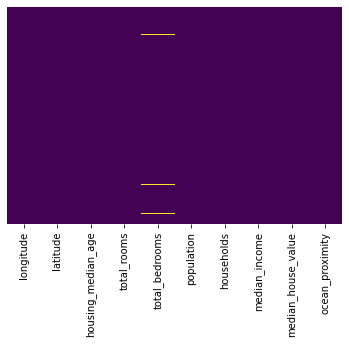

In [13]:
sns.heatmap(df_origin.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [14]:
df_origin[df_origin['total_bedrooms'].isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

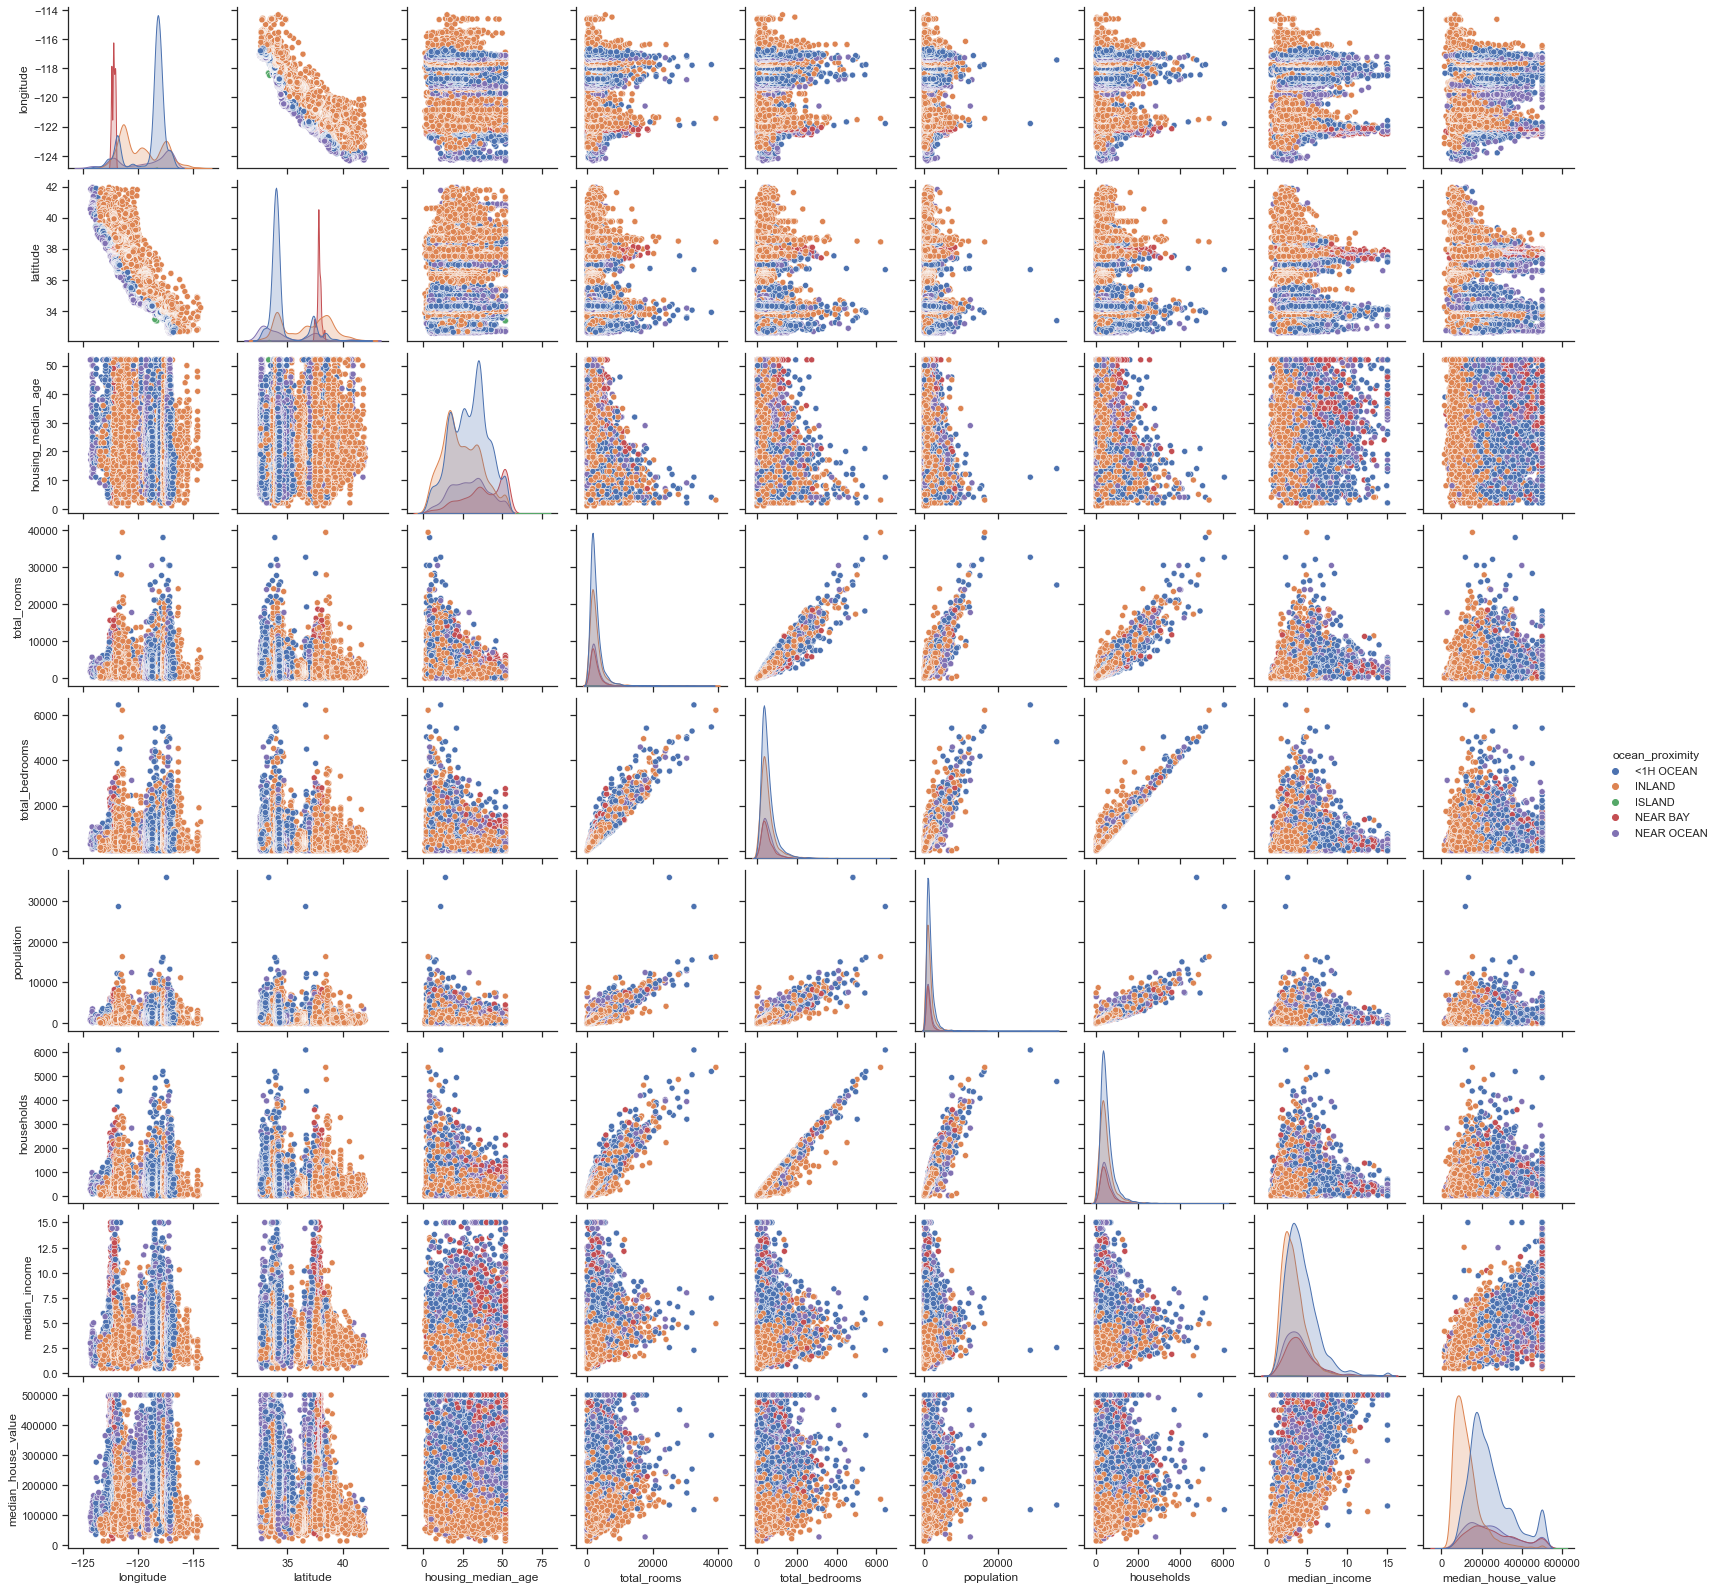

In [15]:
sns.set_theme(style="ticks")
sns.pairplot(df_origin, hue="ocean_proximity")

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

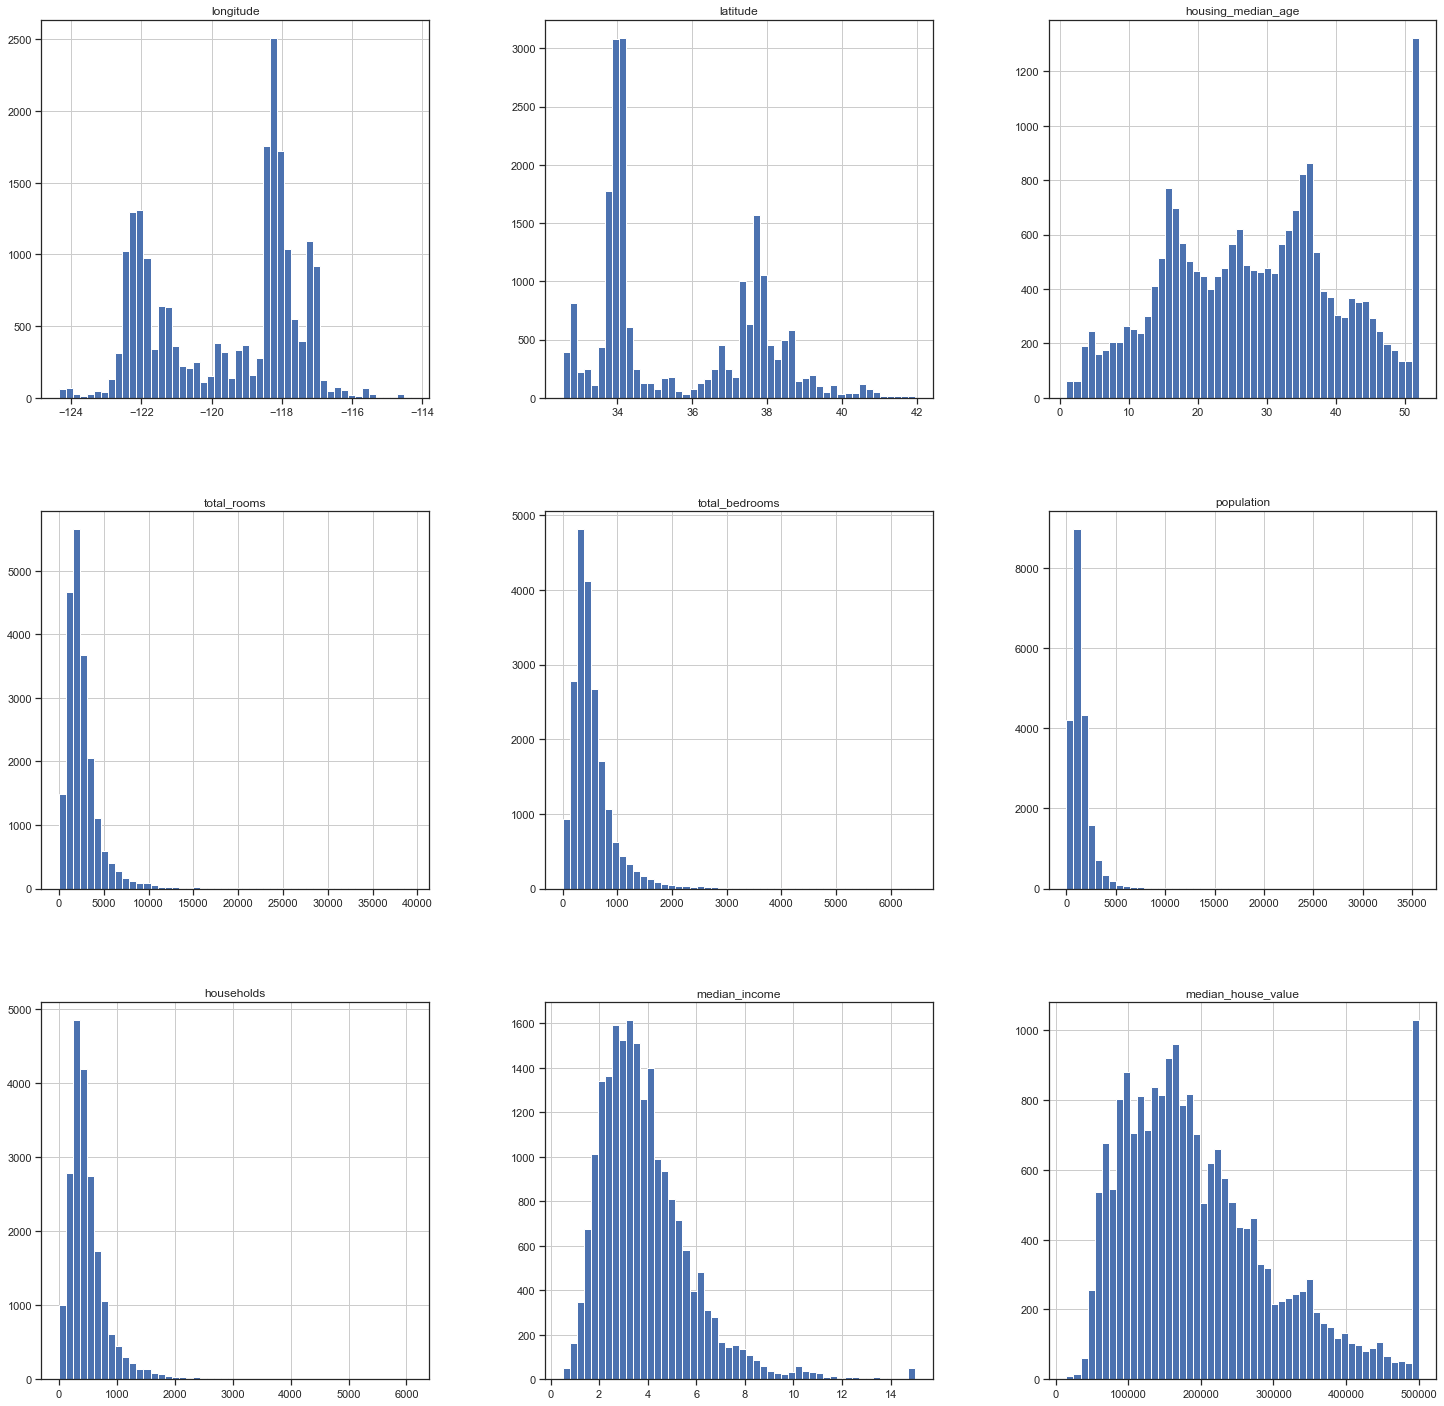

In [16]:
df_origin.hist(figsize=(25,25),bins=50)

CORR ------------------


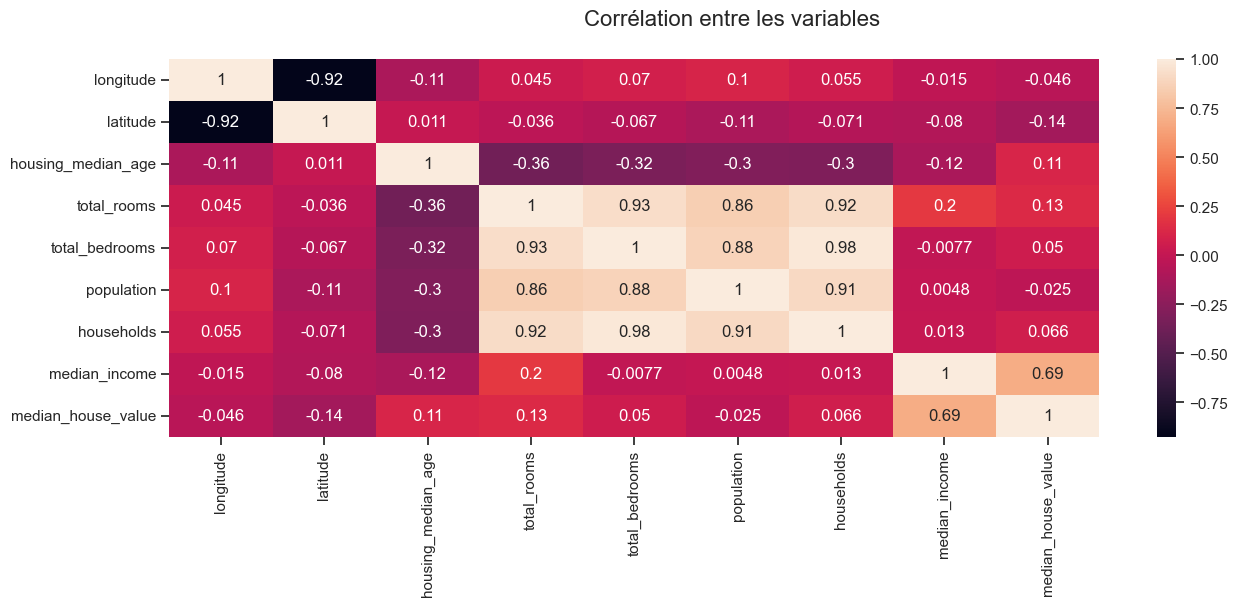

In [17]:
##on utilise data.corr et le heatmap de seborn
corr_df = df_origin.corr()
print("CORR ------------------")
#print(corr_df, "\n")
figure, ax = color_graph_background(1,1)
figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Corrélation entre les variables", fontsize=16)
sns.heatmap(corr_df, annot=True)
plt.show()

In [18]:
df_origin[df_origin['households']>df_origin['population']]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5342     -118.44     34.04                16.0         18.0             6.0   
11849    -121.00     39.75                 8.0       1116.0           214.0   
19522    -121.00     37.65                17.0        484.0           202.0   

       population  households  median_income  median_house_value  \
5342          3.0         4.0         0.5360            350000.0   
11849        27.0        39.0         2.5893             83000.0   
19522       198.0       204.0         0.6825            187500.0   

      ocean_proximity  
5342        <1H OCEAN  
11849          INLAND  
19522          INLAND

Certains ménages sont suppérieurs à la population, ce qui n'est pas logique.

Suppression des lignes concernées.

In [19]:
data = data[data['households']<data['population']]
print("Suppression de :", df_origin.shape[0] - data.shape[0], "lignes, soit :",data.shape)

Suppression de : 3 lignes, soit : (20637, 10)


In [20]:
data[data['total_bedrooms']>data['total_rooms']]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [21]:
cols = get_numeric_columns_names(data)
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

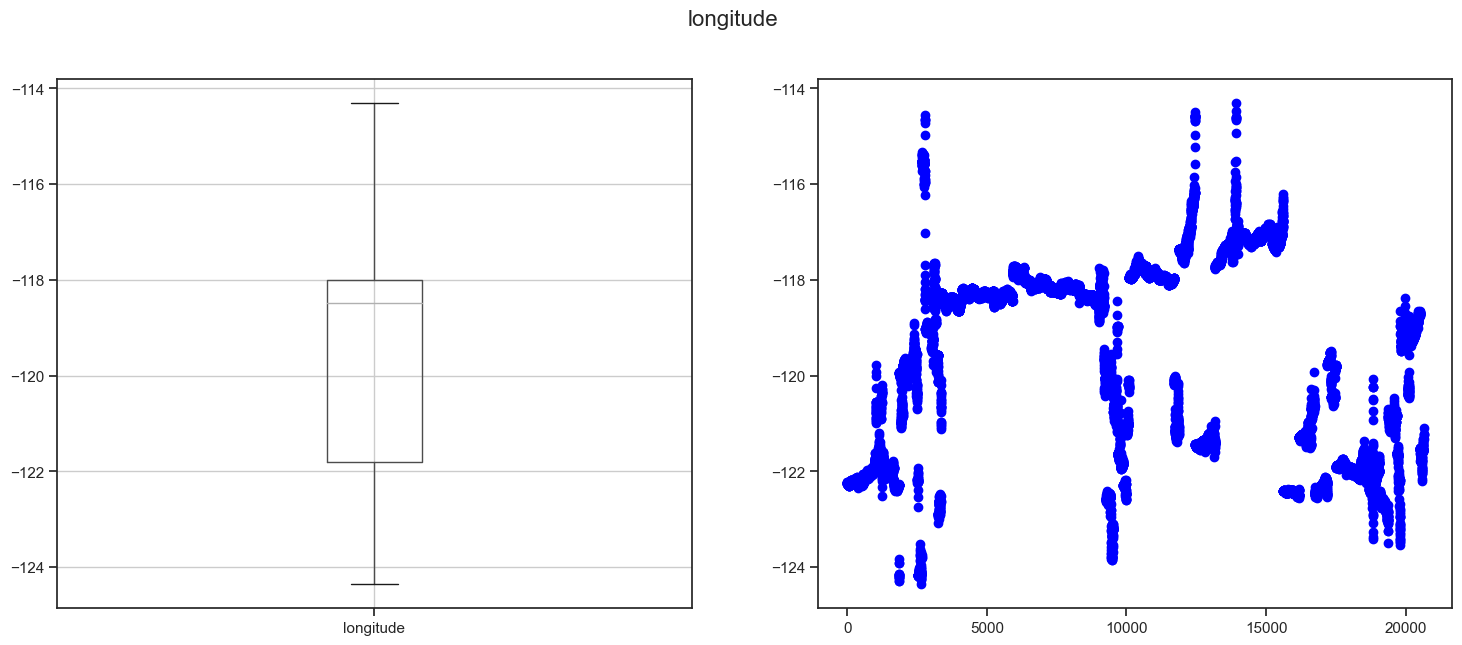

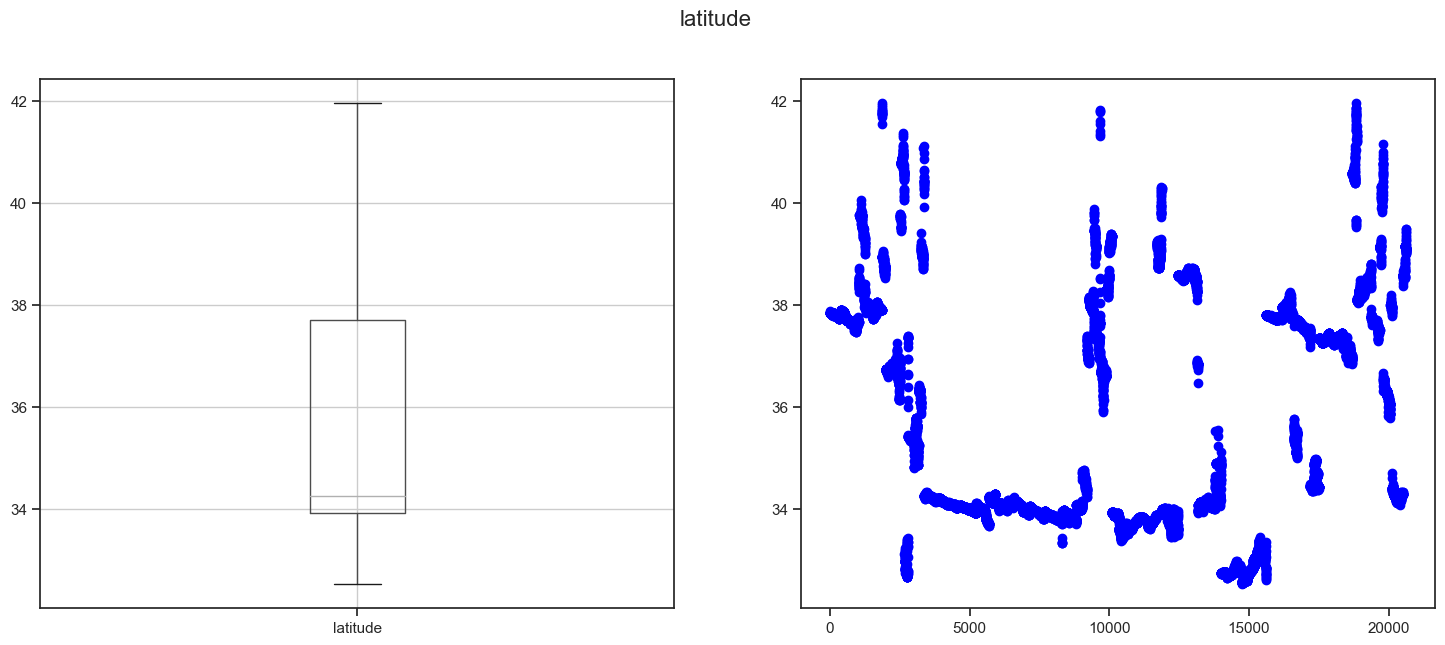

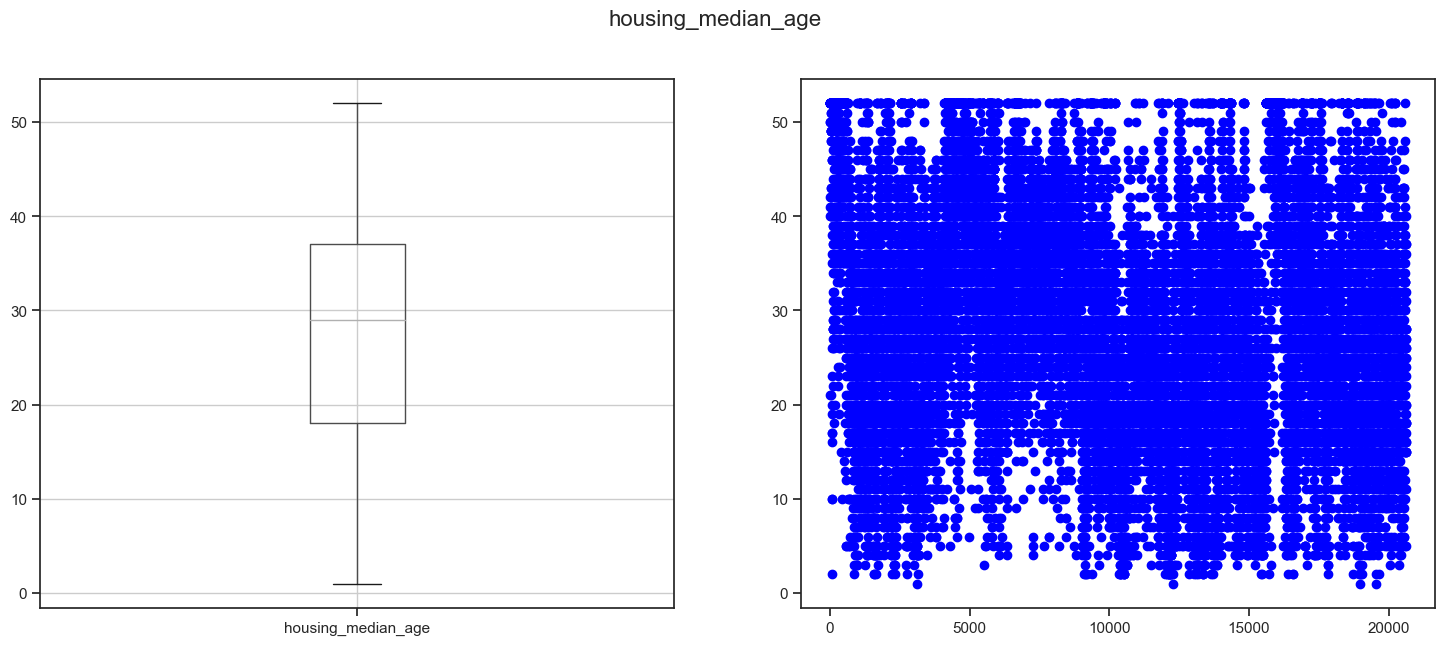

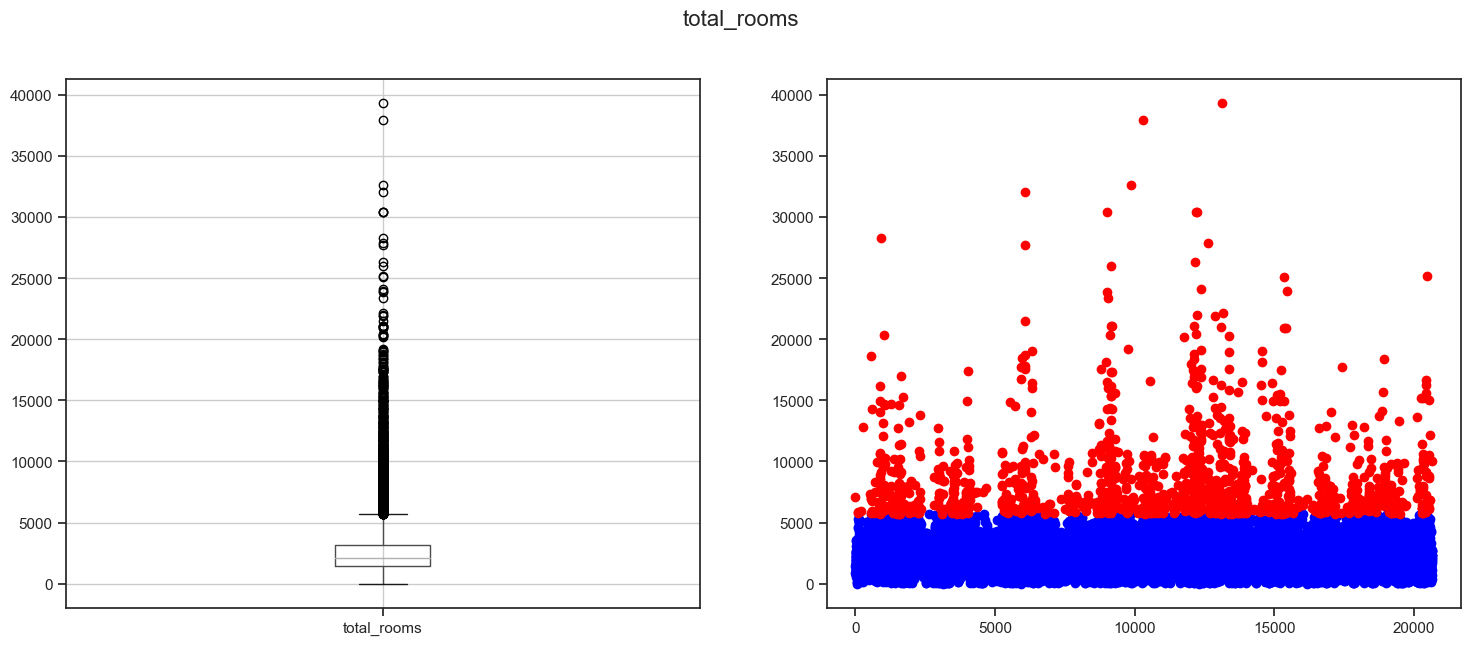

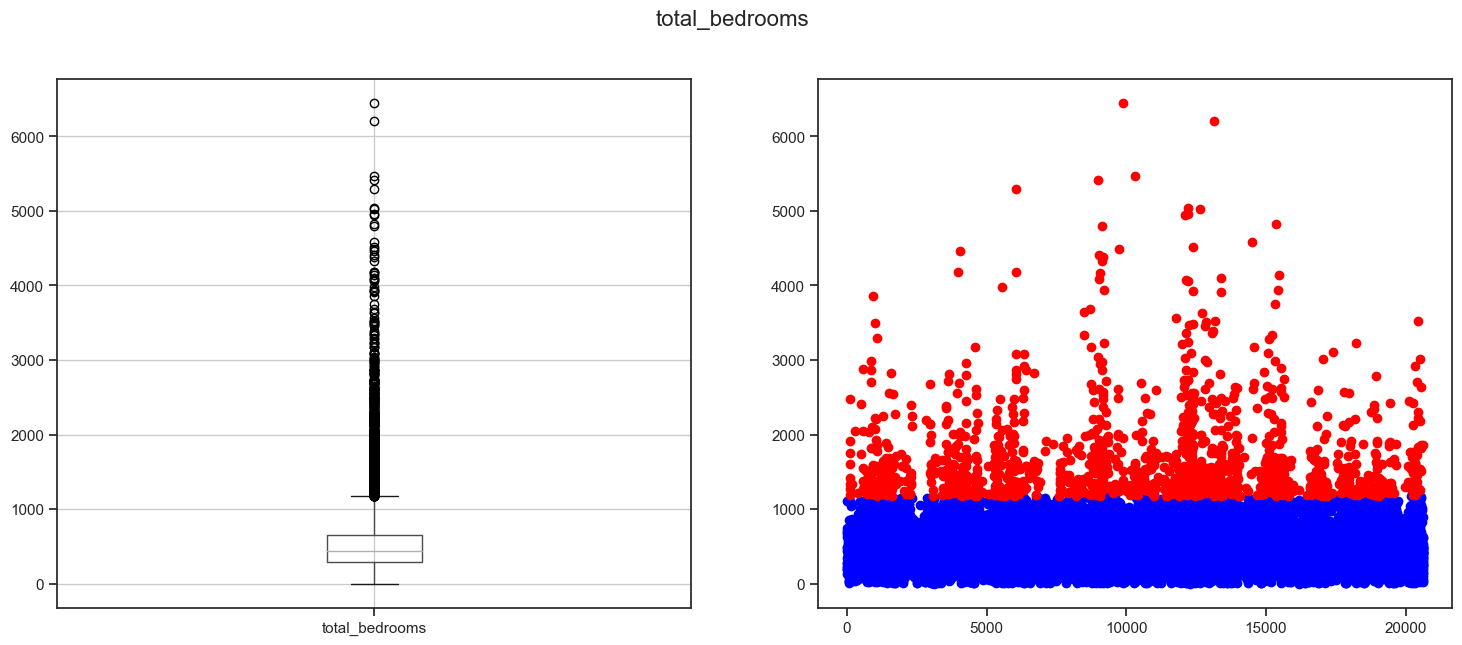

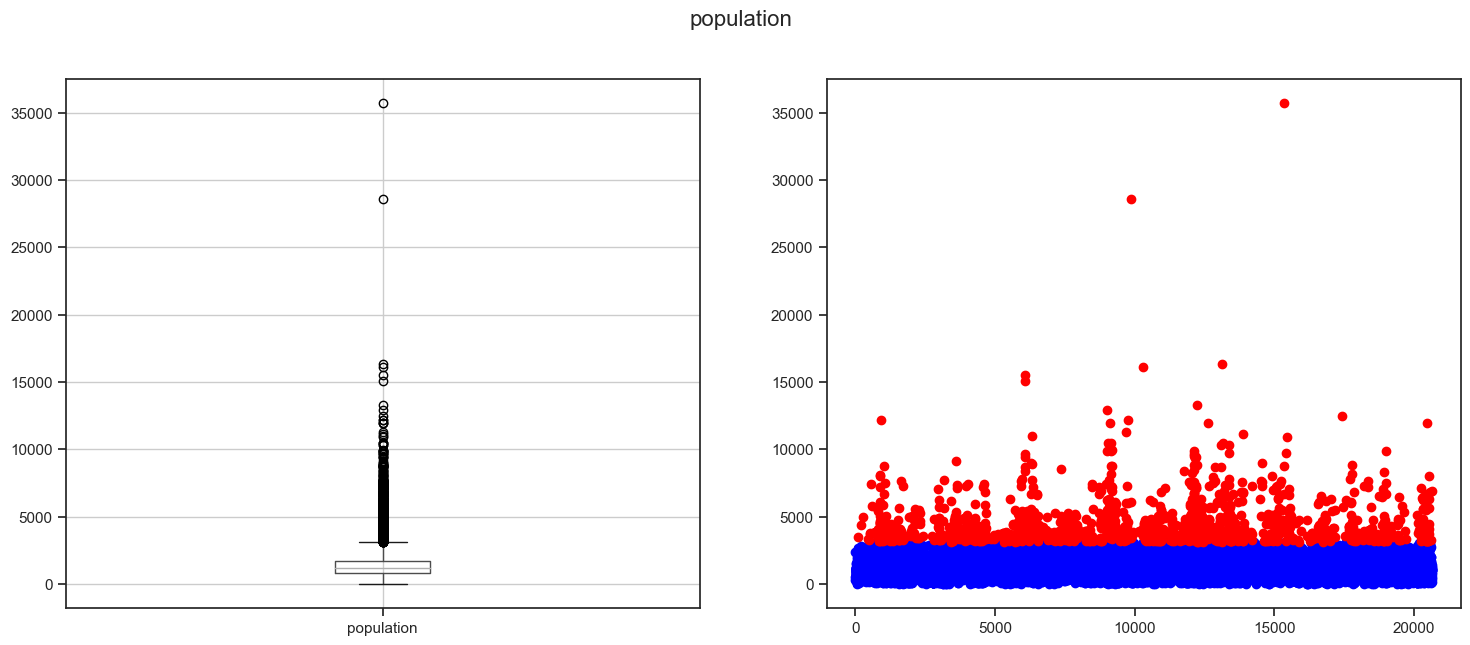

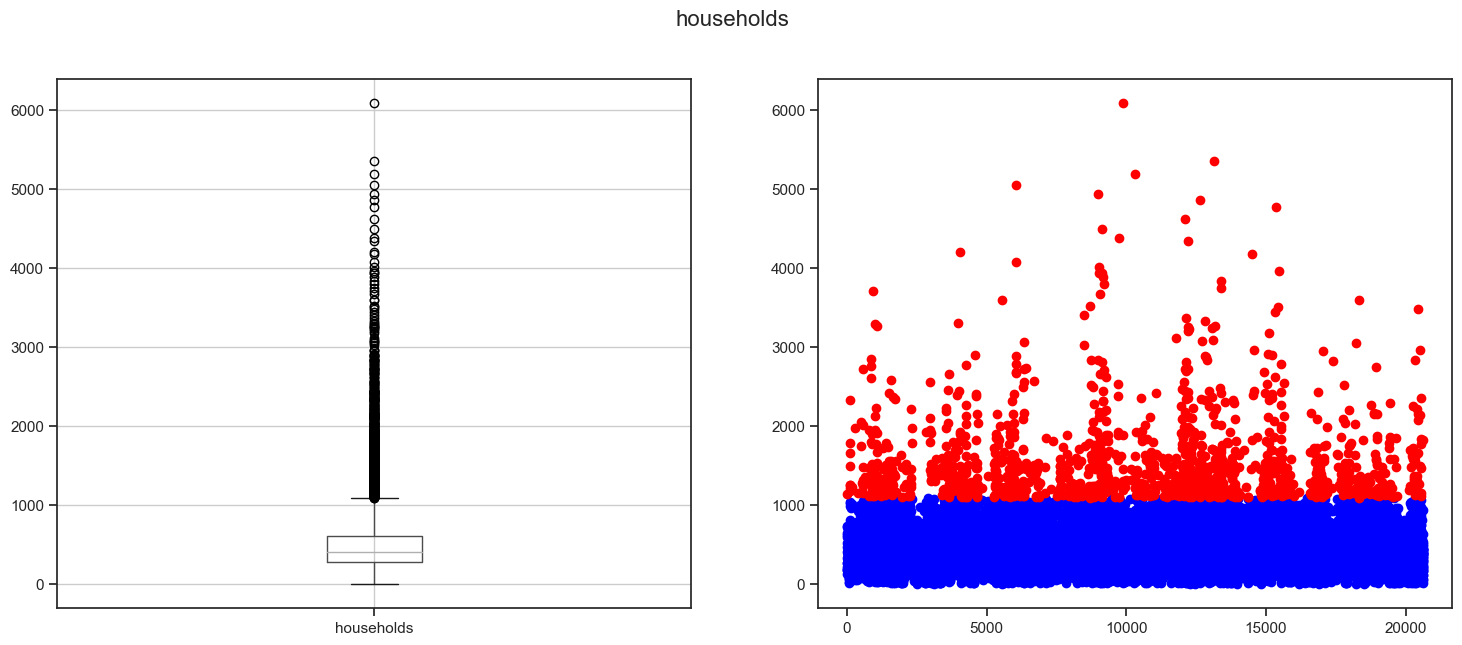

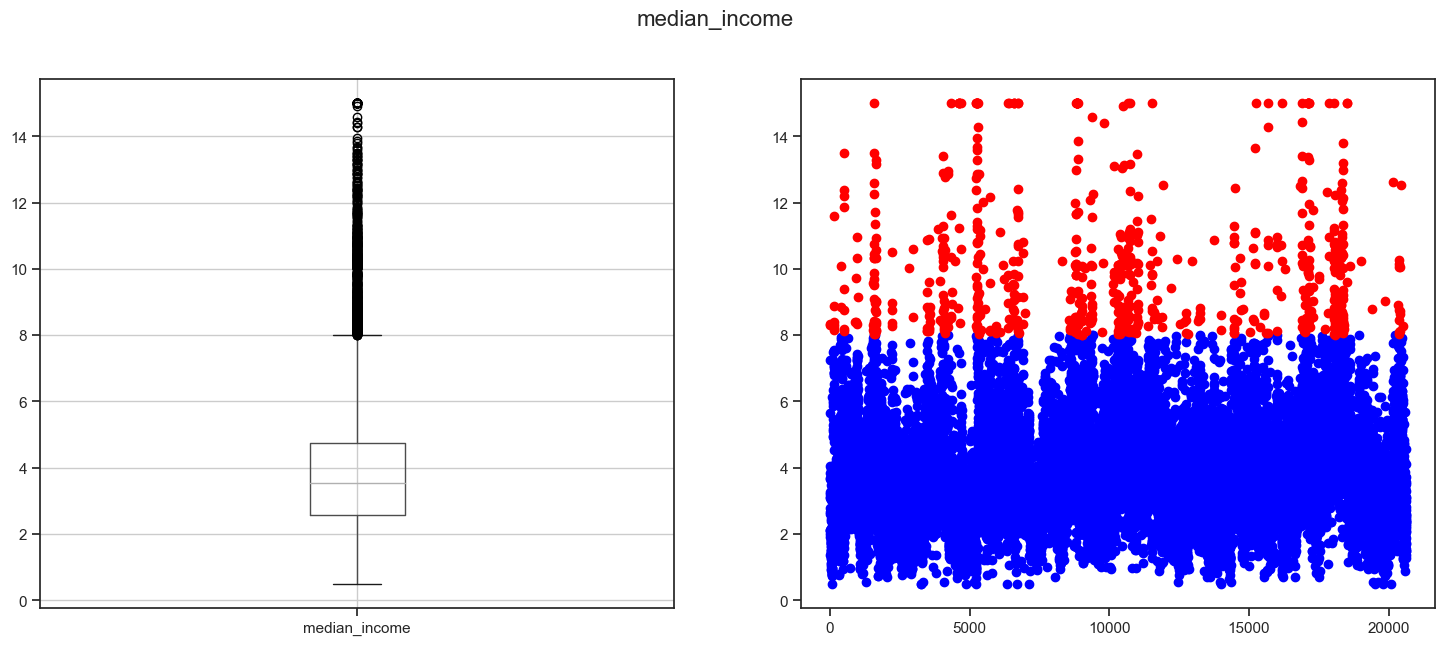

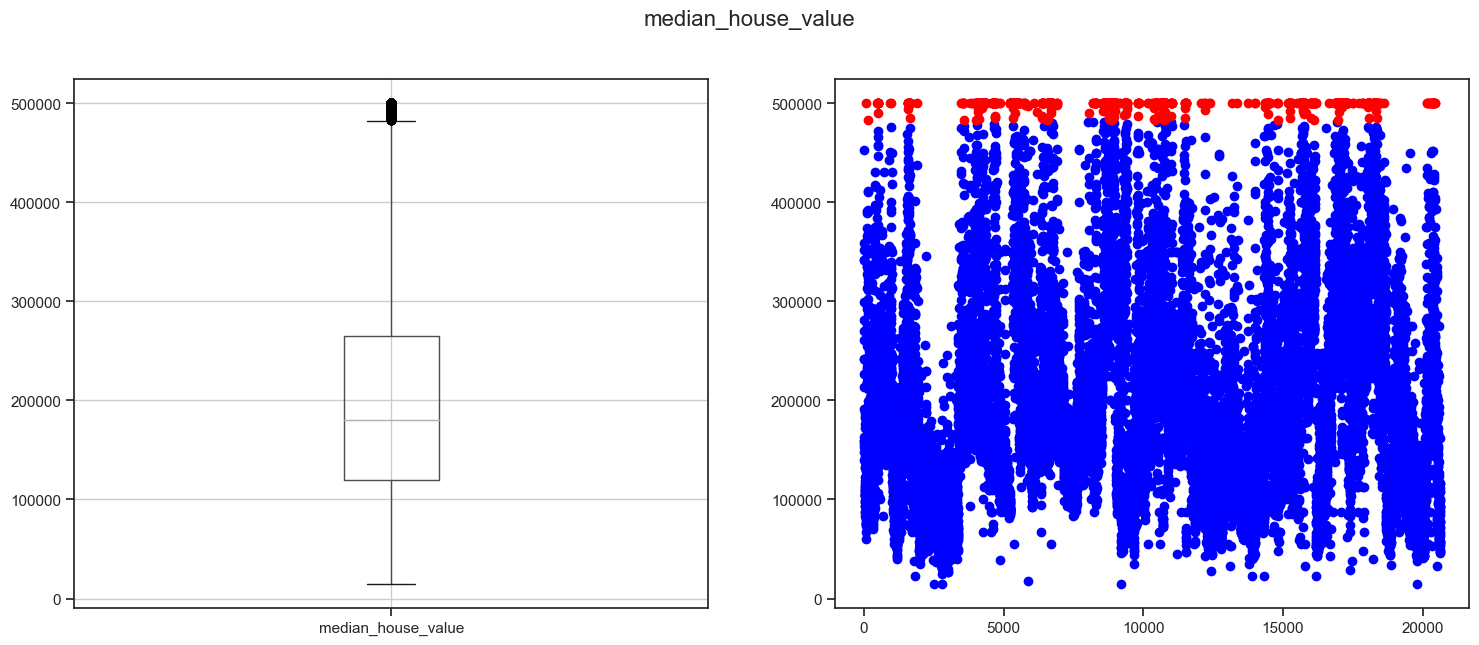

In [22]:
for column_name in cols:
    q_low, q_hi,iqr, q_min, q_max = get_outliers_datas(data, column_name)
    graphe_outliers(data, column_name, q_min, q_max)

Dans un premier temps pas de décision sur le traitement outliers

C:\Program Files\Python39\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

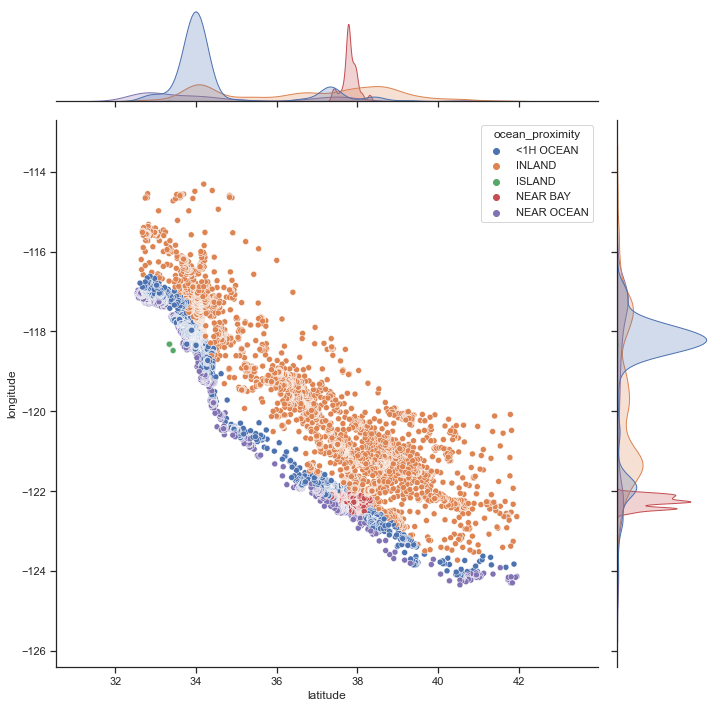

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [23]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, x="latitude",y="longitude", hue="ocean_proximity",size=10)
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.show()
sns.despine

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

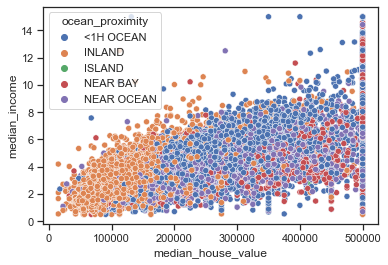

In [24]:
sns.scatterplot(data=data, x="median_house_value", y="median_income", hue="ocean_proximity")

## Mapping

In [25]:
california_img=mpimg.imread(file_path+'california.png')

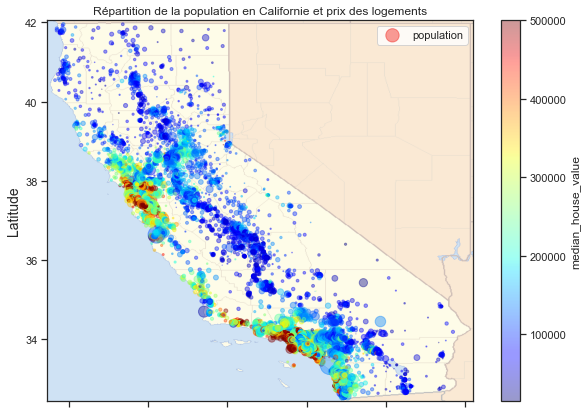

In [26]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=data['population']/100, label='population', figsize=(10,7),
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.title("Répartition de la population en Californie et prix des logements")
plt.show()

In [27]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

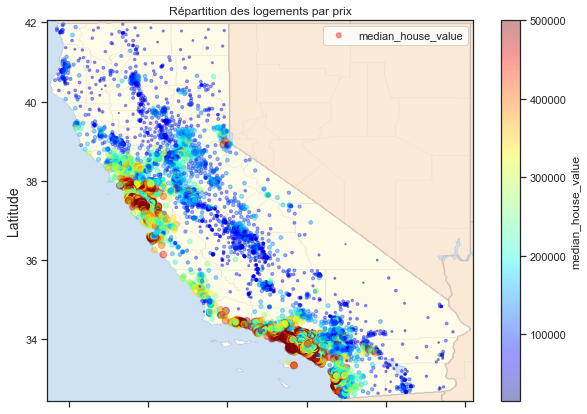

In [28]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=data['median_house_value']/10000, label='median_house_value', figsize=(10,7),
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.title("Répartition des logements par prix")
plt.show()

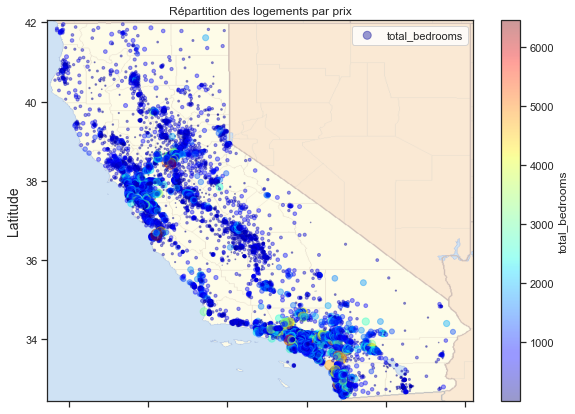

In [29]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=data['total_bedrooms']/50, label='total_bedrooms', figsize=(10,7),
				c='total_bedrooms', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.title("Répartition des logements par prix")
plt.show()

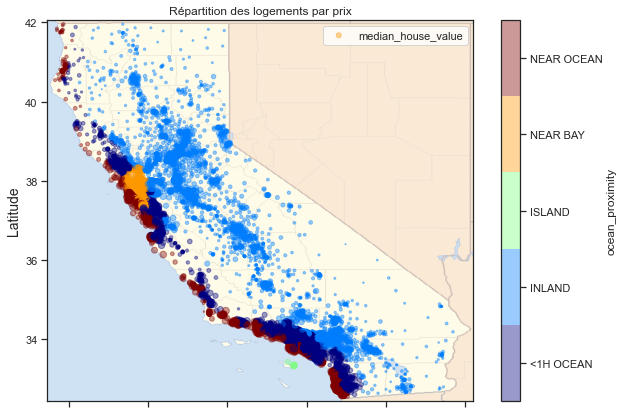

In [30]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=data['median_house_value']/10000, label='median_house_value', figsize=(10,7),
				c='ocean_proximity', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.title("Répartition des logements par prix")
plt.show()

In [31]:
import folium
from folium.plugins import HeatMap
map_hooray = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df = data[['latitude', 'longitude']]
data_temp = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(data_temp, radius=10).add_to(map_hooray)
map_hooray


In [32]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

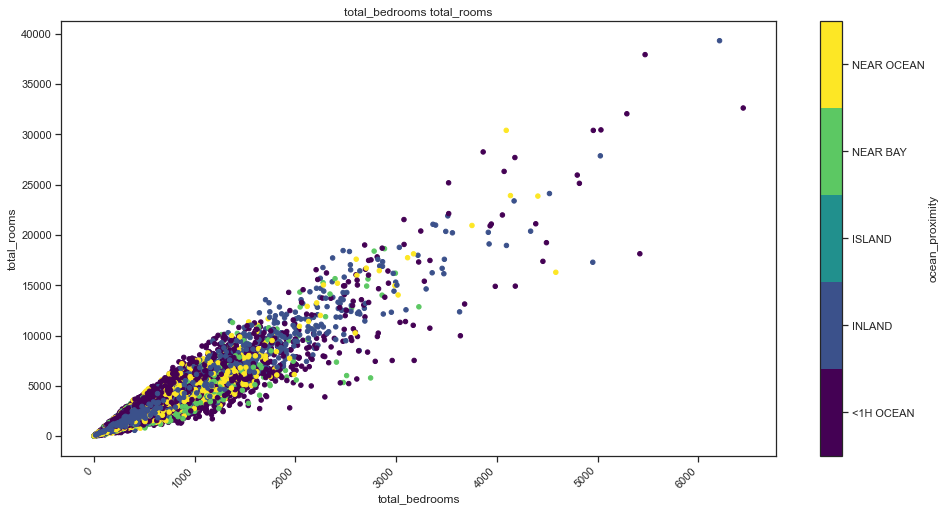

In [33]:
df_temp = df_origin.dropna(axis=0)
draw_regression2(df_origin, 'total_bedrooms', 'total_rooms', 'ocean_proximity')

In [34]:
df_origin.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [35]:
colors = {'<1H OCEAN':'#440154', 'INLAND':'#3B518B', 'NEAR OCEAN':'#FDE725', 'NEAR BAY':'#5CC863', 'ISLAND':'#21908D'}

def draw_regression_3d2(df, col_x, col_y, col_z, col_group=None, colors=None): 
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111, projection = '3d')

    # Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
    tmp_arr = df[col_z][:]
    c = list(colors.keys())
    p = None
    if col_group is None:
        p = ax.scatter(tmp_arr, df[col_x], df[col_y], c=tmp_arr, cmap="viridis")
    else:
        # df['continent'].map(colors)
        ax.scatter(tmp_arr, df[col_x], df[col_y], c=df[col_group].map(colors))
 
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.set_zlabel(col_z)
    if p is not None:
        fig.colorbar(p)
    plt.title(col_x + ", " + col_y + ", "+col_z)
    plt.show()

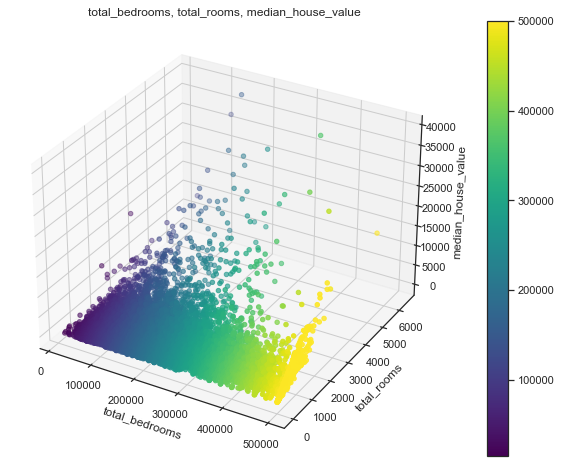

In [36]:
draw_regression_3d2(df_origin, 'total_bedrooms', 'total_rooms', 'median_house_value', colors=colors)

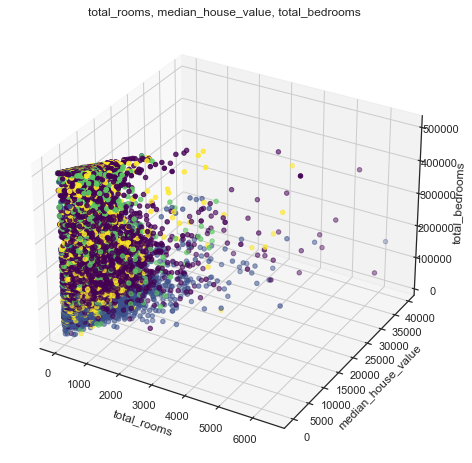

In [37]:
draw_regression_3d2(df_origin, 'total_rooms','median_house_value', 'total_bedrooms', 'ocean_proximity', colors)

# 3. Pre-processing

1. Création du train set / test set
1. Elimination des NaN : dropna(), imputation, colonnes "vides"
1. Encodage
1. Suppression des outliers néfastes au modèle => ce qui veut dire après la 1ère itération
1. Feature Selection
1. Feature Engineering
1. FEature Scaling

Total_bedrooms column a 207 NAN, que nous devons imputer

Codification de l'emplacement ```'ocean_proximity'``` pour faire une régression linéaire et remplacer les NAN du nombre de chambres

In [57]:
data.shape

(20637, 10)

In [38]:
encoder = OneHotEncoder(sparse=False)
transformed = encoder.fit_transform(data[['ocean_proximity']])
transformed

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [39]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9135
INLAND        6549
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [42]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [53]:
data.shape

(20637, 10)

In [59]:
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())
print("ohe_df:", ohe_df.shape, "data:", data.shape)

ohe_df: (20637, 5) data: (20637, 10)


In [60]:
#concat with original data
data_encode = pd.concat([data, ohe_df], axis=1)
print("ohe_df:", ohe_df.shape, "data:", data.shape, "data_encode:", data_encode.shape)
data_encode.head()

ohe_df: (20637, 5) data: (20637, 10) data_encode: (20640, 15)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

In [62]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [61]:
data_encode.isna().sum()

longitude                       3
latitude                        3
housing_median_age              3
total_rooms                     3
total_bedrooms                210
population                      3
households                      3
median_income                   3
median_house_value              3
ocean_proximity                 3
ocean_proximity_<1H OCEAN       3
ocean_proximity_INLAND          3
ocean_proximity_ISLAND          3
ocean_proximity_NEAR BAY        3
ocean_proximity_NEAR OCEAN      3
dtype: int64

In [69]:
df_origin['ocean_proximity'] = df_origin['ocean_proximity'].astype('object')
df_origin.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [84]:
df_origin.shape

(20640, 10)

In [85]:
data2 = df_origin[df_origin['households']<df_origin['population']].copy()
data2.shape

(20637, 10)

In [91]:
data2 = df_origin.copy()
print(data2.shape)
data2 = data2.drop(index=data2[data2['households']>data2['population']].index)
data2.shape

(20640, 10)


(20637, 10)

In [86]:
data2

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20637 rows x 10 columns]

In [74]:
# data2['ocean_proximity'] = data2['ocean_proximity'].astype('category')
# data2.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [92]:
encoder2 = OneHotEncoder(sparse=False)
transformed2 = encoder2.fit_transform(data2[['ocean_proximity']])
print("data2:", data2.shape)
#Create a Pandas DataFrame of the hot encoded column
ohe_df2 = pd.DataFrame(transformed2, columns=encoder.get_feature_names_out())
print("data2:", data2.shape, "ohe_df2:", ohe_df2.shape)
#concat with original data
data_encode2 = pd.concat([data2, ohe_df2], axis=1)
print("data2:", data2.shape, "ohe_df2:", ohe_df2.shape, "data_encode2:", data_encode2.shape)
data_encode2.head()

data2: (20637, 10)
data2: (20637, 10) ohe_df2: (20637, 5)
data2: (20637, 10) ohe_df2: (20637, 5) data_encode2: (20640, 15)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

In [105]:
mes_valeurs =data2['ocean_proximity'].values.reshape(-1,1)
print(mes_valeurs.shape)
mes_valeurs

(20637, 1)


array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [106]:
encoder2 = OneHotEncoder(sparse=False)
transformed2 = encoder2.fit_transform(mes_valeurs)
transformed2

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
index_nan

In [112]:
# encoder2 = OneHotEncoder(sparse=False)
# transformed2 = encoder2.fit_transform(data2[['ocean_proximity']].values)
print("data2:", data2.shape)
#Create a Pandas DataFrame of the hot encoded column
ohe_df2 = pd.DataFrame(transformed2, columns=encoder.get_feature_names_out())
ohe_df2.iloc[index_nan,:]
# Int64Index([5342, 11849, 19522], dtype='int64')

data2: (20637, 10)


ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
5342                         1.0                     0.0   
11849                        0.0                     1.0   
19522                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
5342                      0.0                       0.0   
11849                     0.0                       0.0   
19522                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
5342                          0.0  
11849                         0.0  
19522                         0.0

In [113]:
data2.iloc[index_nan,:]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5343     -118.44     34.04                31.0       2670.0           662.0   
11851    -120.53     39.79                18.0       1234.0           266.0   
19525    -121.00     37.64                52.0        530.0           177.0   

       population  households  median_income  median_house_value  \
5343       1535.0       631.0         3.0714            347800.0   
11851       543.0       201.0         2.5156             71900.0   
19525       325.0       158.0         1.1875             90600.0   

      ocean_proximity  
5343        <1H OCEAN  
11851          INLAND  
19525          INLAND

In [107]:
# encoder2 = OneHotEncoder(sparse=False)
# transformed2 = encoder2.fit_transform(data2[['ocean_proximity']].values)
print("data2:", data2.shape)
#Create a Pandas DataFrame of the hot encoded column
ohe_df2 = pd.DataFrame(transformed2, columns=encoder.get_feature_names_out())
print("data2:", data2.shape, "ohe_df2:", ohe_df2.shape)
#concat with original data
data_encode2 = pd.concat([data2, ohe_df2], axis=1)
print("data2:", data2.shape, "ohe_df2:", ohe_df2.shape, "data_encode2:", data_encode2.shape)
data_encode2.head()

data2: (20637, 10)
data2: (20637, 10) ohe_df2: (20637, 5)
data2: (20637, 10) ohe_df2: (20637, 5) data_encode2: (20640, 15)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

In [78]:
data_encode2.isna().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity                 0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [94]:
index_nan = data_encode[data_encode["longitude"].isna()].index
index_nan

Int64Index([5342, 11849, 19522], dtype='int64')

In [95]:
data2.iloc[index_nan]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5343     -118.44     34.04                31.0       2670.0           662.0   
11851    -120.53     39.79                18.0       1234.0           266.0   
19525    -121.00     37.64                52.0        530.0           177.0   

       population  households  median_income  median_house_value  \
5343       1535.0       631.0         3.0714            347800.0   
11851       543.0       201.0         2.5156             71900.0   
19525       325.0       158.0         1.1875             90600.0   

      ocean_proximity  
5343        <1H OCEAN  
11851          INLAND  
19525          INLAND

In [96]:
ohe_df2.iloc[index_nan]

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
5342                         1.0                     0.0   
11849                        0.0                     1.0   
19522                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
5342                      0.0                       0.0   
11849                     0.0                       0.0   
19522                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
5342                          0.0  
11849                         0.0  
19522                         0.0

In [97]:
df_origin.iloc[index_nan]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5342     -118.44     34.04                16.0         18.0             6.0   
11849    -121.00     39.75                 8.0       1116.0           214.0   
19522    -121.00     37.65                17.0        484.0           202.0   

       population  households  median_income  median_house_value  \
5342          3.0         4.0         0.5360            350000.0   
11849        27.0        39.0         2.5893             83000.0   
19522       198.0       204.0         0.6825            187500.0   

      ocean_proximity  
5342        <1H OCEAN  
11849          INLAND  
19522          INLAND

In [65]:
index_nan = data_encode[data_encode["longitude"].isna()].index
# Int64Index([5342, 11849, 19522], dtype='int64')
data.iloc[index_nan]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5343     -118.44     34.04                31.0       2670.0           662.0   
11851    -120.53     39.79                18.0       1234.0           266.0   
19525    -121.00     37.64                52.0        530.0           177.0   

       population  households  median_income  median_house_value  \
5343       1535.0       631.0         3.0714            347800.0   
11851       543.0       201.0         2.5156             71900.0   
19525       325.0       158.0         1.1875             90600.0   

      ocean_proximity  
5343        <1H OCEAN  
11851          INLAND  
19525          INLAND

In [67]:
df_origin.iloc[index_nan]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5342     -118.44     34.04                16.0         18.0             6.0   
11849    -121.00     39.75                 8.0       1116.0           214.0   
19522    -121.00     37.65                17.0        484.0           202.0   

       population  households  median_income  median_house_value  \
5342          3.0         4.0         0.5360            350000.0   
11849        27.0        39.0         2.5893             83000.0   
19522       198.0       204.0         0.6825            187500.0   

      ocean_proximity  
5342        <1H OCEAN  
11849          INLAND  
19522          INLAND

In [ ]:
data_encode

In [43]:
encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

Faire une régression linéaire pour estimer le nombre de chambre

In [41]:
data_encode.isna().sum()

longitude                       3
latitude                        3
housing_median_age              3
total_rooms                     3
total_bedrooms                210
population                      3
households                      3
median_income                   3
median_house_value              3
ocean_proximity                 3
ocean_proximity_<1H OCEAN       3
ocean_proximity_INLAND          3
ocean_proximity_ISLAND          3
ocean_proximity_NEAR BAY        3
ocean_proximity_NEAR OCEAN      3
dtype: int64

In [56]:
data_encode.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [42]:
data_encode.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [51]:
data_encode.shape

(20640, 15)

In [43]:
X_full = data_encode[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

X = data_encode.loc[data_encode['total_bedrooms'].notna(),['total_rooms']]
y = data_encode.loc[data_encode['total_bedrooms'].notna(),['total_bedrooms']]

X_pred = data_encode.loc[(data_encode['total_bedrooms'].isna()) & (data_encode['total_rooms'].notna()),['total_rooms']]

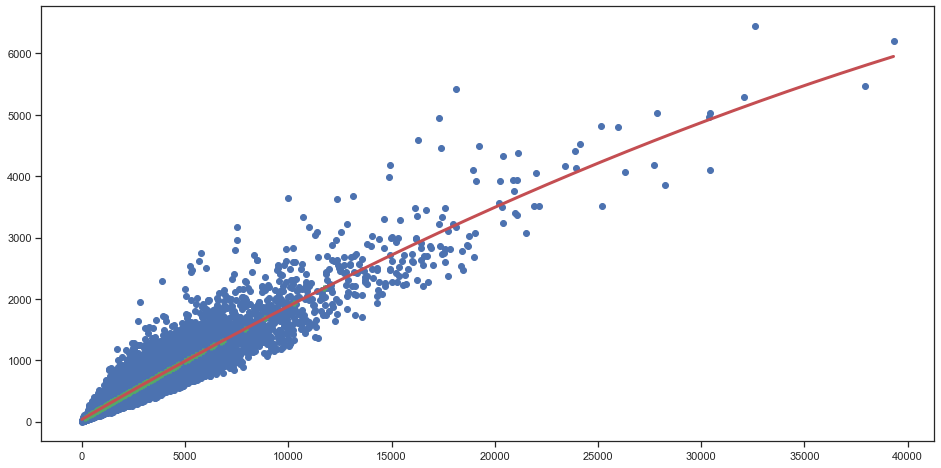

In [71]:
pf=PolynomialFeatures(degree=2,include_bias=False)
Xpf= pf.fit_transform(X)

linreg = LinearRegression()
linreg.fit(Xpf,y)

X_new = np.linspace(min(X.values), max(X.values), X.shape[0]).reshape(len(X), 1)
X_newPoly = pf.fit_transform(X_new)
y_new = linreg.predict(X_newPoly)

X_pred_poly = pf.fit_transform(X_pred)
y_pred2 = linreg.predict(X_pred_poly)

figure, axe = color_graph_background(1,1)
axe.scatter(X, y)
axe.plot(X_new, y_new, c='r', lw=3)
axe.scatter(X_pred, y_pred2, c='g', marker='+', lw=3)
figure.set_size_inches(16, 8, forward=True)


Affectation du nombre chambre par rapport aux prédictions

In [97]:
X_pred["y_pred"] = y_pred2
data_encode.loc[X_pred.index, 'total_bedrooms'] = X_pred["y_pred"]
data_encode.iloc[X_pred.index]

longitude  latitude  housing_median_age  total_rooms total_bedrooms  \
290      -122.16     37.77                47.0       1256.0     278.993982   
341      -122.17     37.75                38.0        992.0     227.927307   
538      -122.28     37.78                29.0       5154.0    1014.209908   
563      -122.24     37.75                45.0        891.0     208.347735   
696      -122.10     37.69                41.0        746.0     180.197133   
...          ...       ...                 ...          ...            ...   
20267    -119.19     34.20                18.0       3620.0     729.076947   
20268    -119.18     34.19                19.0       2393.0     497.083806   
20372    -118.88     34.17                15.0       4260.0     848.699963   
20460    -118.75     34.29                17.0       5512.0    1079.968781   
20484    -118.72     34.28                17.0       3051.0     621.927807   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
290          NEAR BAY                        0.0                     0.0   
341          NEAR BAY                        0.0                     0.0   
538          NEAR BAY                        0.0                     0.0   
563          NEAR BAY                        0.0                     0.0   
696          NEAR BAY                        0.0                     0.0   
...               ...                        ...                     ...   
20267      NEAR OCEAN                        0.0                     0.0   
20268      NEAR OCEAN                        0.0                     0.0   
20372       <1H OCEAN                        1.0                     0.0   
20460       <1H OCEAN                        1.0                     0.0   
20484       <1H OCEAN                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
290                       0.0                       1.0   
341                       0.0                       1.0   
538                       0.0                       1.0   
563                       0.0                       1.0   
696                       0.0                       1.0   
...                       ...                       ...   
20267                     0.0                       0.0   
20268                     0.0                       0.0   
20372                     0.0                       0.0   
20460                     0.0                       0.0   
20484                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
290                           0.0  
341                           0.0  
538                           0.0  
563                           0.0  
696                           0.0  
...                           ...  
20267                         1.0  
20268                         1.0  
20372                         0.0  
20460                         0.0  
20484                         0.0  

[207 rows x 15 columns]

Faire une régression polynomiale avec plusieurs critères, car total_bedroom est très corrélée aux features :
* ```'total_rooms'```
* ```'households'```
* ```'population'```

In [100]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [112]:
data_encode["total_rooms_formula"] = data['total_bedrooms']
data_encode["total_rooms_formula"].isna().sum()

210

In [121]:
data_encode.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'total_rooms_formula'],
      dtype='object')

In [ ]:
data_encode[['ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'total_rooms_formula']]

In [120]:
data_encode.loc[mask,:].isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
ocean_proximity_<1H OCEAN     3
ocean_proximity_INLAND        3
ocean_proximity_ISLAND        3
ocean_proximity_NEAR BAY      3
ocean_proximity_NEAR OCEAN    3
total_rooms_formula           0
dtype: int64

In [118]:
mask = data_encode["total_rooms_formula"].notnull()

lr = smf.ols(formula='total_rooms_formula ~ total_rooms + households + population',
             data=data_encode.loc[mask,:]).fit()

data_encode.loc[~mask, 'total_rooms_formula'] = round(lr.predict(data_encode.loc[mask,:].drop(columns=['total_rooms_formula'])),0)
data_encode.isnull().sum()



longitude                       3
latitude                        3
housing_median_age              3
total_rooms                     3
total_bedrooms                  3
population                      3
households                      3
median_income                   3
median_house_value              3
ocean_proximity                 3
ocean_proximity_<1H OCEAN       3
ocean_proximity_INLAND          3
ocean_proximity_ISLAND          3
ocean_proximity_NEAR BAY        3
ocean_proximity_NEAR OCEAN      3
total_rooms_formula           210
dtype: int64

In [116]:
data_encode["total_rooms_formula"].isna().sum()

210

In [25]:
print(data["total_bedrooms"].describe())

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


<AxesSubplot:>

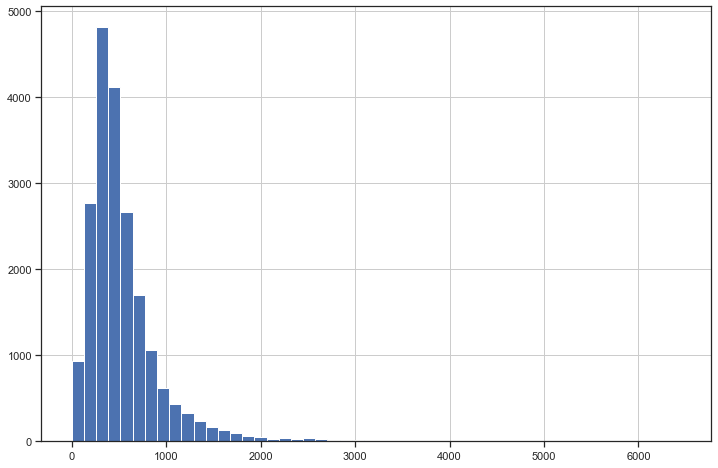

In [26]:
total_bedroms = data[data["total_bedrooms"].notnull()]["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

In [27]:
data["total_bedrooms"].head()

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64

In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy ="median")
imputer.fit(data[["total_bedrooms"]])
data["total_bedrooms"] = imputer.transform(data[["total_bedrooms"]])
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [29]:
# Vérification de ce qui a été imputé
data.loc[df_origin["total_bedrooms"].isna(), "total_bedrooms"].value_counts()

435.0    207
Name: total_bedrooms, dtype: int64

Tous les NAN ont été remplacé par 435